# Good Structure: Elements Alternation

In [8]:
import pandas as pd
import json

def alternation_score(sequence):
    """
    Compute an alternation score for a sequence of components.
    Repeated 'text' or 'count' elements are collapsed into one before computing alternations.
    """

    # Collapse consecutive 'text' or 'count' elements
    collapsed = []
    prev = None
    for elem in sequence:
        if elem in ["text", "count"]:
            if prev != elem:
                collapsed.append(elem)
        else:
            collapsed.append(elem)
        prev = elem

    if len(collapsed) < 2:
        return 1.0

    changes = sum(1 for i in range(len(collapsed) - 1) if collapsed[i] != collapsed[i + 1])
    score = changes / (len(collapsed) - 1)
    return score



In [9]:
with open("data_stories_summary.json", "r", encoding="utf-8") as f:
    data = json.load(f)

results = []

for story_id, story_content in data.items():
    elements = story_content.get("elements", [])
    score = alternation_score(elements)
    results.append({
        "story_id": story_id,
        "alternation_score": score
    })

df_alternation = pd.DataFrame(results)
df_alternation.to_csv("alternation_scores.csv")

print(df_alternation)

    story_id  alternation_score
0   D-hp3wDV           0.700000
1   y4Srva15           0.400000
2   7qpfziir           0.928571
3   Nokx0yU6           0.666667
4   gz_gxhYn           0.928571
5   U2OtB3XT           0.928571
6   v4h_GSI0           0.800000
7   1ptR3pru           0.250000
8   JQpdcw-d           0.882353
9   B9SLlUry           0.428571
10  r7i-PG2n           0.846154
11  AUmcnOzL           0.888889
12  tyK82z37           0.764706
13  IRRbkmZk           0.818182
14  Vy4_Rxzv           0.500000
15  M9EZmoBI           0.851852
16  uhDaBOl1           0.733333
17  SXefpzf4           0.500000
18  EzsIH_Et           0.500000
19  16FP4tfG           0.400000
20  sUMoEZI5           0.684211
21  _HnVHPjm           0.666667
22  4D206Lam           0.454545
23  j3ZikN40           0.700000
24  BOGODrvZ           1.000000
25  abkhtH-r           0.300000
26  Huo1mZpJ           1.000000
27  JYOzBt8Y           0.500000
28  buiNjeJj           0.473684
29  PziKYGG_           0.882353
30  wa1_

In [ ]:
import pandas as pd 

df_alternation = pd.read_csv('alternation_scores.csv', index_col=0)
df_sparql = pd.read_csv('sparql_proficiency_new.csv', index_col=0) # using new SPARQL proficiency with many features (can be changed to sparql_proficiency.csv to see the difference)

df_combined = pd.merge(df_alternation[['story_id', 'alternation_score']],
                       df_sparql[['story_id', 'sparql_proficiency']],
                       on='story_id', how='inner')

story_no_text = ['SXefpzf4', 'EzsIH_Et', '6yGct8pP']

df_filtered = df_combined[~df_combined['story_id'].isin(story_no_text)]

print(df_filtered)

    story_id  alternation_score  sparql_proficiency
0   D-hp3wDV           0.700000            0.419361
1   y4Srva15           0.400000            0.293553
2   7qpfziir           0.928571            0.344963
3   Nokx0yU6           0.666667            0.228978
4   gz_gxhYn           0.928571            0.337006
5   U2OtB3XT           0.928571            0.366358
6   v4h_GSI0           0.800000            0.311218
7   1ptR3pru           0.250000            0.289714
8   JQpdcw-d           0.882353            0.280591
9   B9SLlUry           0.428571            0.375198
10  r7i-PG2n           0.846154            0.576555
11  AUmcnOzL           0.888889            0.470986
12  tyK82z37           0.764706            0.243941
13  IRRbkmZk           0.818182            0.312014
14  Vy4_Rxzv           0.500000            0.422130
15  M9EZmoBI           0.851852            0.226322
16  uhDaBOl1           0.733333            0.182971
19  16FP4tfG           0.400000            0.318246
20  sUMoEZI5

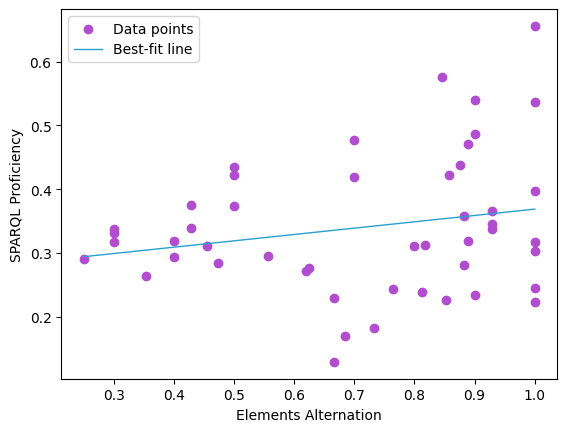

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array(df_filtered['alternation_score'])
y = np.array(df_filtered['sparql_proficiency'])
 
# Compute best-fit line (linear regression)
m, b = np.polyfit(x, y, 1)  # 1st-degree polynomial (y = mx + b)
 
# Create scatter plot
plt.scatter(x, y, color='#b14ecf', label="Data points")
 
# Plot best-fit line
x_sorted = np.sort(x)
plt.plot(x_sorted, m*x_sorted + b, color='#29a1cf', linewidth=1, label="Best-fit line")
 
# Labels and title
plt.xlabel("Elements Alternation")
plt.ylabel("SPARQL Proficiency")
plt.legend()
plt.show()

In [4]:
# Pearson
correlation = df_filtered['alternation_score'].corr(df_filtered['sparql_proficiency'])
print("Pearson correlation coefficient:", correlation)

# Spearman 
spearman_corr = df_filtered['alternation_score'].corr(df_filtered['sparql_proficiency'], method='spearman')
print("Spearman correlation coefficient:", spearman_corr)

# Previous:
# Pearson correlation coefficient: 0.2171293565383903
# Spearman correlation coefficient: 0.0675842543714905

# Pearson correlation coefficient: 0.2607499341556242
# Spearman correlation coefficient: 0.2360625381993656

Pearson correlation coefficient: 0.21583836703257564
Spearman correlation coefficient: 0.18101754081278543
